In [1]:
# Generate NCI reports for given projects
import os
import sys

user_id = os.environ['USER']

# Insert your local paths here
sys.path.append(f'/home/548/{user_id}/code/nci_resource_tools')
sys.path.append(f'/home/548/{user_id}/code/nci-tools/src/ncitools')


In [2]:
import pandas as pd
import subprocess 
from lquota import lquota
from nci_account import nci_account

In [3]:
CoE_projects = ['gb02','fy29','if69','ng72','su28']

In [93]:
project = 'gb02'

account=nci_account(project)

SU=account['usage']

SUs_df=pd.DataFrame.from_dict(SU['users']).T

In [94]:
account['usage']['total_grant']

4500000.0

In [95]:
SUs_df

,usage,acquired,total_released,total_reserved
ab2313,13.26E+03,1.66E+03,2.08E+03,1.66E+03
ab4502,3.20E+03,0.00E+00,14.10E+03,0.00E+00
ad0579,8.77E+03,0.00E+00,1.72E+03,0.00E+00
ad1803,17.66E+00,0.00E+00,0.00E+00,0.00E+00
ak2642,2.21E+03,490.00E+00,559.89E+00,490.00E+00
cb4968,25.11E+03,0.00E+00,62.83E+03,0.00E+00
cd3022,320.00E-03,0.00E+00,287.68E+00,0.00E+00
cxh603,754.40E+00,0.00E+00,1.82E+03,0.00E+00
dh3280,18.70E+03,10.52E+03,11.42E+03,10.52E+03
ec0044,493.96E+00,0.00E+00,326.35E+00,0.00E+00


<Axes: >

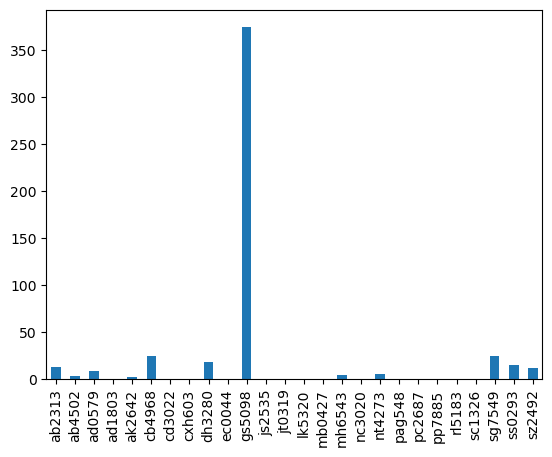

In [89]:
SUs_df.T.loc['usage'].plot.bar(stacked=True)

In [47]:
storage=account['storage']

In [48]:
for key in storage.keys():
    print(key,storage[key])

global-gdata6 {'block_usage': 14778215866368, 'inode_usage': 519095, 'allocations': [{'db_id': 5105, 'project': 'gb02', 'filesystem': 'global-gdata6', 'funding_source': '21CW', 'block_allocation': 87960930222080.0, 'inode_allocation': 5623000}]}
gadi-scratch2 {'block_usage': 27316120764416, 'inode_usage': 1072814, 'allocations': [{'db_id': 5098, 'project': 'gb02', 'filesystem': 'gadi-scratch2', 'funding_source': 'Gadi-Scratch', 'block_allocation': 131941395333120.0, 'inode_allocation': 7954000}]}


In [50]:
# Find the largest individual users (this takes a while)
command = f'du -hs /g/data/{project}/* | sort -h'
output = subprocess.run(command, capture_output=True, shell=True)

c=output.stdout.decode('utf-8').splitlines()

# Split the output and create a dictionary
d = {}
for x in c:
    d[x.split('/')[-1]] = x.split('\t')[0]

user_storage = pd.DataFrame.from_dict(d,orient='index')

In [53]:
user_storage[::-1]

,0
sl5165,6.6T
zz6006,3.5T
sc5932,836G
ad0576,620G
ak2642,368G
sg7549,166G
users,48G
mf9078,45G
ec0044,25G
lk5320,23G


In [7]:
# Find the largest individual users (this takes a while)
command = f'du -s /g/data/{project}/* | sort -h'
output_numberic = subprocess.run(command, capture_output=True, shell=True)

c=output_numberic.stdout.decode('utf-8').splitlines()

# Split the output and create a dictionary
d = {}
for x in c:
    d[x.split('/')[-1]] = x.split('\t')[0]

user_storage_numeric = pd.DataFrame.from_dict(d,orient='index')

KeyboardInterrupt: 

In [54]:
c=output_numberic.stdout.decode('utf-8').splitlines()

# Split the output and create a dictionary
d = {}
for x in c:
    d[x.split('/')[-1]] = x.split('\t')[0]

user_storage_numeric = pd.DataFrame.from_dict(d,orient='index').astype('int')

In [55]:
user_storage_numeric.rename(columns={0:'size'},inplace=True)

In [60]:
pd.set_eng_float_format(accuracy=2)
user_storage_numeric.sort_values('size',ascending=False)/1024

,size
sl5165,6.85E+06
zz6006,3.64E+06
sc5932,855.69E+03
ad0576,634.64E+03
ak2642,376.53E+03
sg7549,169.30E+03
users,48.65E+03
mf9078,45.24E+03
ec0044,25.59E+03
lk5320,23.39E+03


<Axes: >

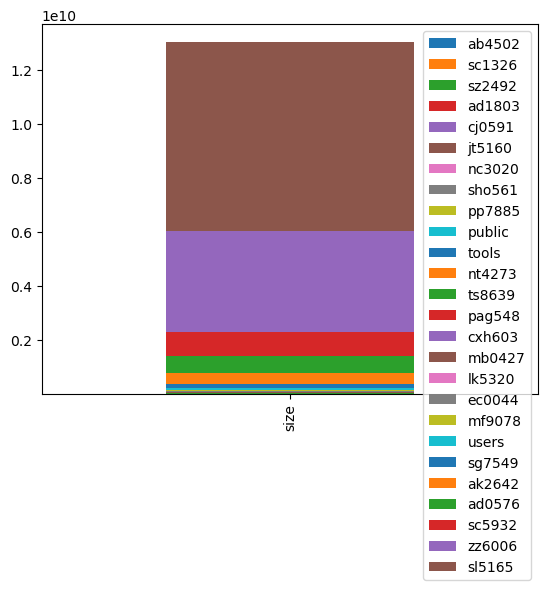

In [67]:
user_storage_numeric.T.plot.bar(stacked=True)